<a href="https://colab.research.google.com/github/SBoo9/Zeotap_Assignment/blob/main/Sujoy_Banerjee_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load datasets
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

In [3]:
# Merge data
data = pd.merge(customers, transactions, on='CustomerID')

In [4]:
# Feature engineering
features = data.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'TotalValue': 'mean',
    'Price': 'mean'
}).reset_index()

In [5]:
# Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(features.iloc[:, 1:])
features['Cluster'] = clusters

In [6]:
# Evaluation
db_index = davies_bouldin_score(features.iloc[:, 1:-1], clusters)
print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 0.6410325786923026


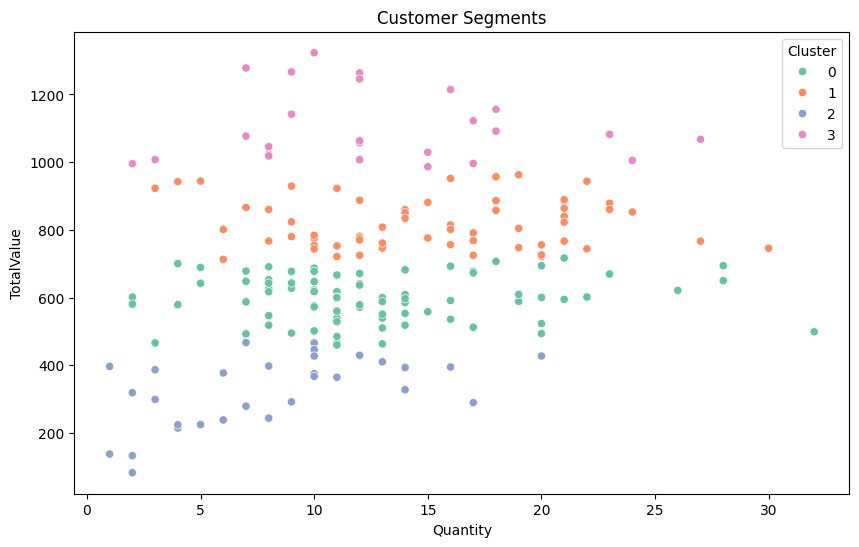

In [7]:
# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=features, x='Quantity', y='TotalValue', hue='Cluster', palette='Set2')
plt.title('Customer Segments')
plt.show()